# 2603655_DataAcquisition

## Week6 20240910

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
* [Tableau](https://public.tableau.com/app/profile/yuttapong.m/vizzes)
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('thaisky_airways_bookings.csv')
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['flight_date'] = pd.to_datetime(df['flight_date'])
df['days_before_flight'] = (df['flight_date'] - df['booking_date']).dt.days
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   booking_date        50000 non-null  datetime64[ns]
 1   flight_date         50000 non-null  datetime64[ns]
 2   price               50000 non-null  float64       
 3   days_before_flight  50000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 1.5 MB


,booking_date,flight_date,price,days_before_flight
0,2022-06-24,2023-01-01,7129.925638,191
1,2022-06-24,2023-01-01,7129.925638,191
2,2022-07-05,2023-01-08,6800.089944,187
3,2022-07-06,2023-01-10,7045.713808,188
4,2022-07-06,2023-01-10,7045.713808,188


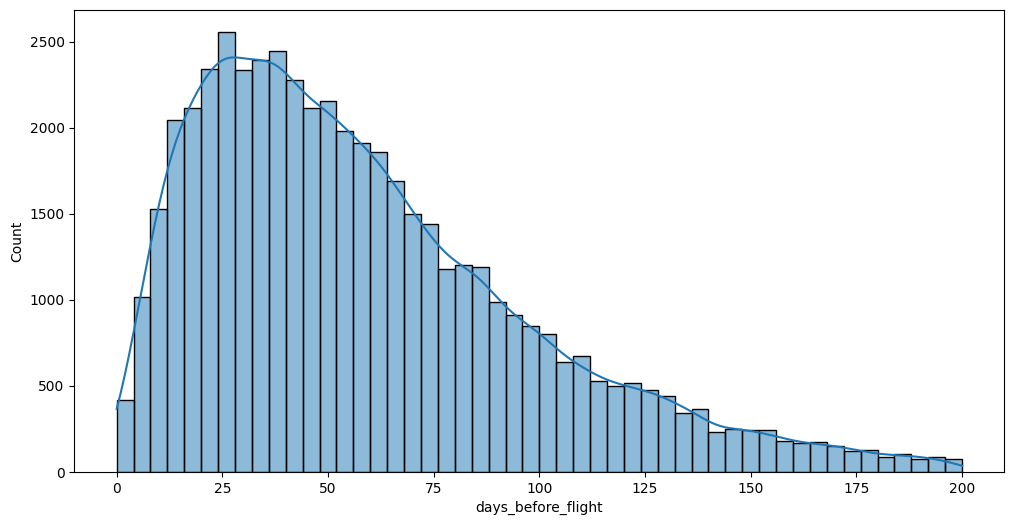

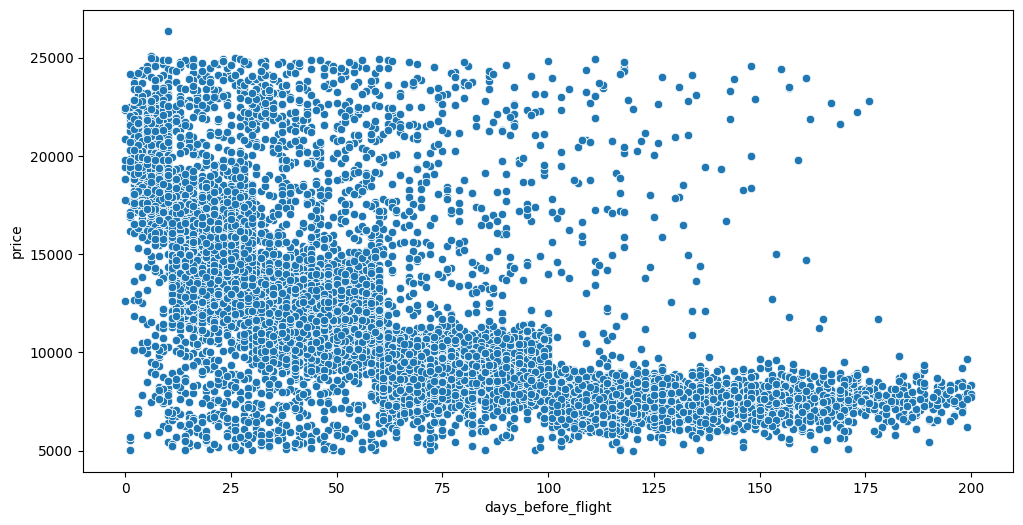

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['days_before_flight'],bins=50,kde=True)
plt.show()
print()

plt.figure(figsize=(12,6))
sns.scatterplot(x='days_before_flight',y='price',data=df)
plt.show()

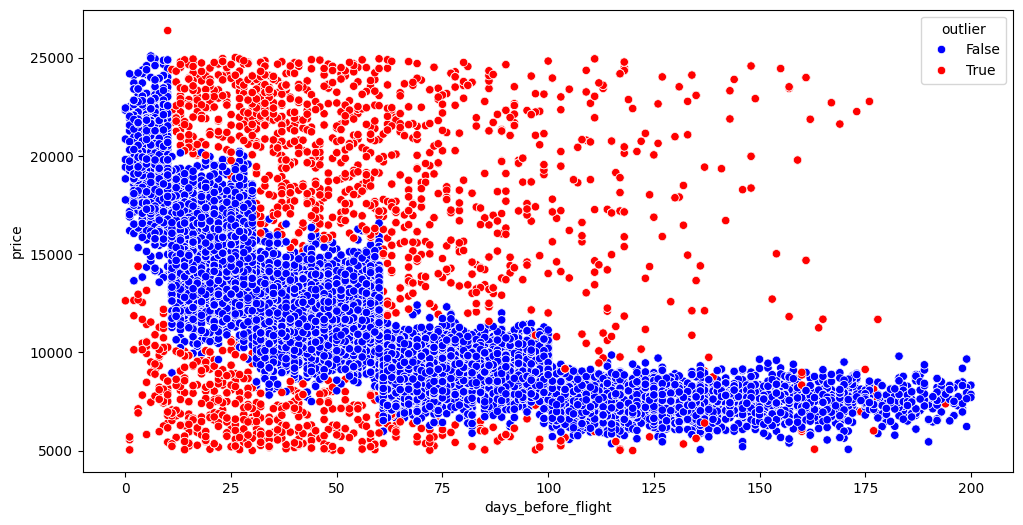

In [ ]:
df['outlier'] = False

for days_before_flight in df['days_before_flight'].unique():
  df_temp = df[df['days_before_flight'] == days_before_flight]

  Q1 = df_temp['price'].quantile(0.25)
  Q3 = df_temp['price'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  mask = (df_temp['price'] < lower_bound) | (df_temp['price'] > upper_bound)
  outliers = df_temp[mask].copy()

  df.loc[outliers.index,'outlier'] = True

fig,ax = plt.subplots(figsize=(12,6))
color_palette = {False:'blue',True:'red'}
sns.scatterplot(x='days_before_flight',y='price',hue='outlier',palette=color_palette,data=df,ax=ax)
plt.show()

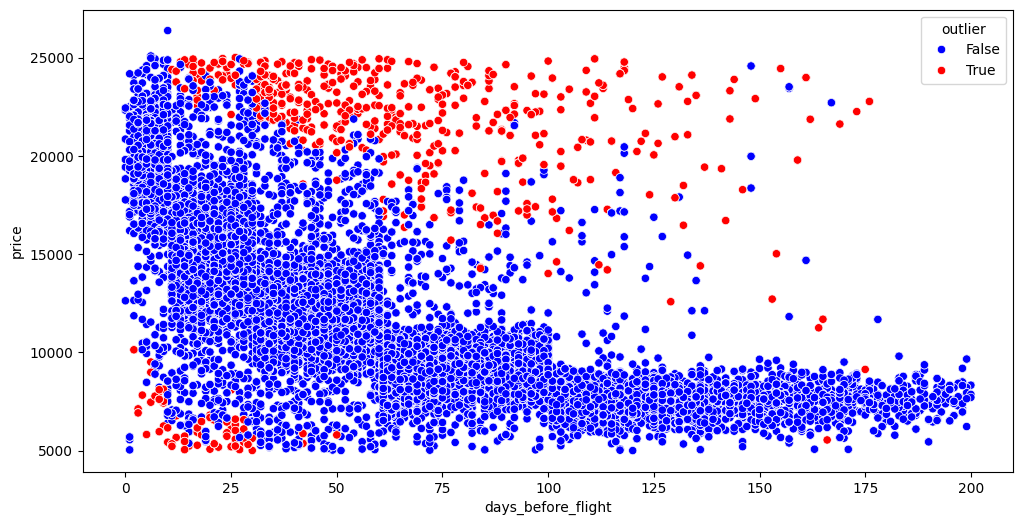

In [ ]:
df['outlier'] = False

for days_before_flight in df['days_before_flight'].unique():
  df_temp = df[df['days_before_flight'] == days_before_flight]

  mean_price = df_temp['price'].mean()
  std_price = df_temp['price'].std()

  z_scores = (df_temp['price']-mean_price)/std_price

  outliers = df_temp[abs(z_scores) > 3].copy()
  df.loc[outliers.index,'outlier'] = True

fig,ax = plt.subplots(figsize=(12,6))
color_palette = {False:'blue',True:'red'}
sns.scatterplot(x='days_before_flight',y='price',hue='outlier',palette=color_palette,data=df,ax=ax)
plt.show()

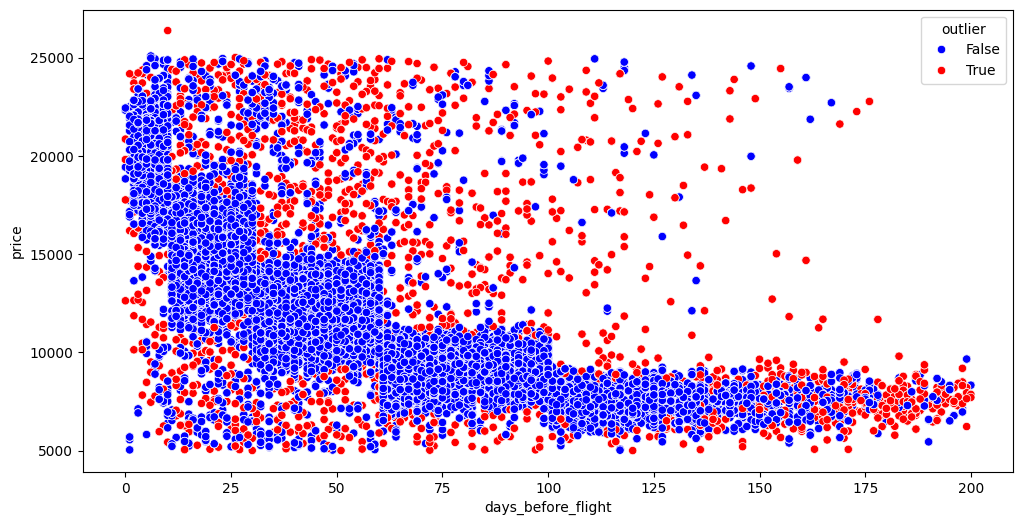

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df['outlier'] = False

for days_before_flight in df['days_before_flight'].unique():
  df_temp = df[df['days_before_flight'] == days_before_flight]

  X = df_temp[['price']].values
  X = StandardScaler().fit_transform(X)

  dbscan = DBSCAN(eps=0.1,min_samples=5)
  clusters = dbscan.fit_predict(X)
  outliers = df_temp[clusters == -1].copy()

  df.loc[outliers.index,'outlier'] = True

fig,ax = plt.subplots(figsize=(12,6))
color_palette = {False:'blue',True:'red'}
sns.scatterplot(x='days_before_flight',y='price',hue='outlier',palette=color_palette,data=df,ax=ax)
plt.show()

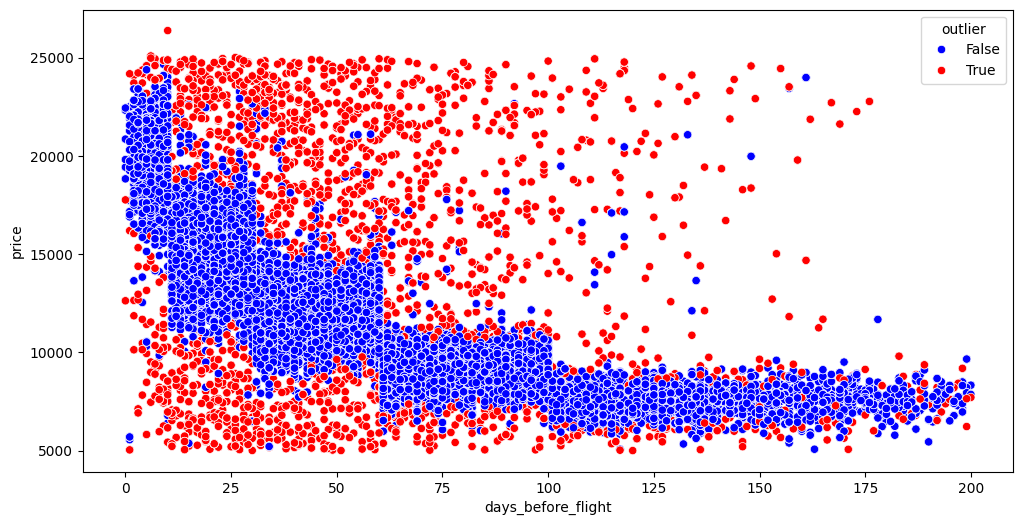

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df['outlier'] = False

for days_before_flight in df['days_before_flight'].unique():
  df_temp = df[df['days_before_flight'] == days_before_flight]

  X = df_temp[['price']].values
  X = StandardScaler().fit_transform(X)

  iso_forest = IsolationForest(contamination=0.1,random_state=42)
  outlier_labels = iso_forest.fit_predict(X)

  outliers = df_temp[outlier_labels == -1].copy()
  df.loc[outliers.index,'outlier'] = True

fig,ax = plt.subplots(figsize=(12,6))
color_palette = {False:'blue',True:'red'}
sns.scatterplot(x='days_before_flight',y='price',hue='outlier',palette=color_palette,data=df,ax=ax)
plt.show()

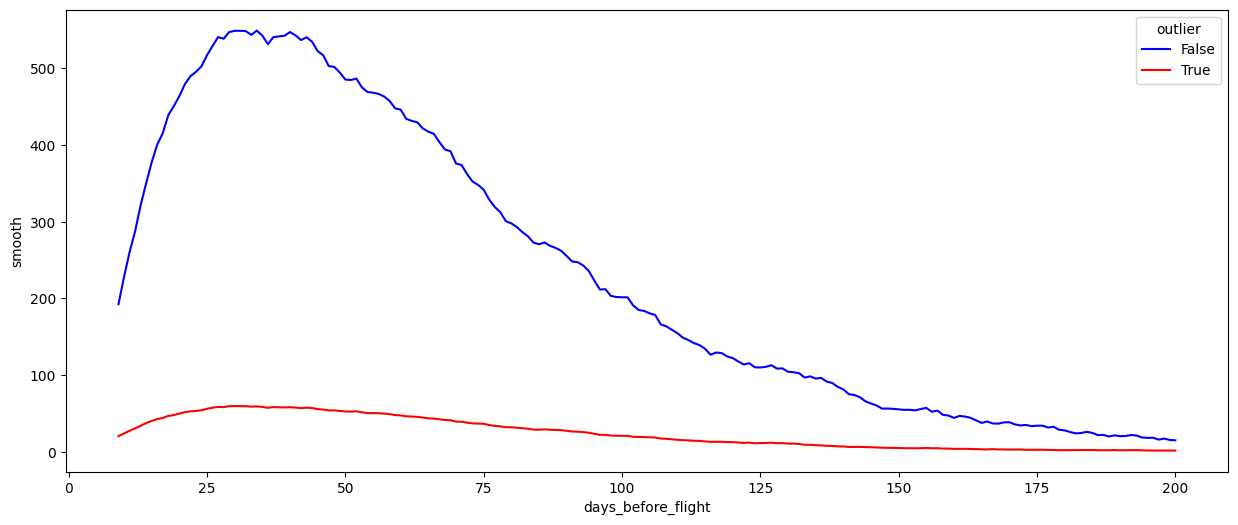

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
outlier_count = df.groupby('days_before_flight')['outlier'].value_counts().reset_index()

# outlier_count
# sns.lineplot(x='days_before_flight',y='count',hue='outlier',palette=color_palette,ax=ax,data=outlier_count)

outlier_count.sort_values(by='days_before_flight',inplace=True)
outlier_count.loc[outlier_count['outlier'] == False,'smooth'] = \
   outlier_count[outlier_count['outlier'] == False]['count'].rolling(window=10).mean()
outlier_count.loc[outlier_count['outlier'] == True,'smooth'] = \
   outlier_count[outlier_count['outlier'] == True]['count'].rolling(window=10).mean()
sns.lineplot(x='days_before_flight', y='smooth', hue='outlier', data=outlier_count, palette=color_palette,ax=ax)

plt.show()

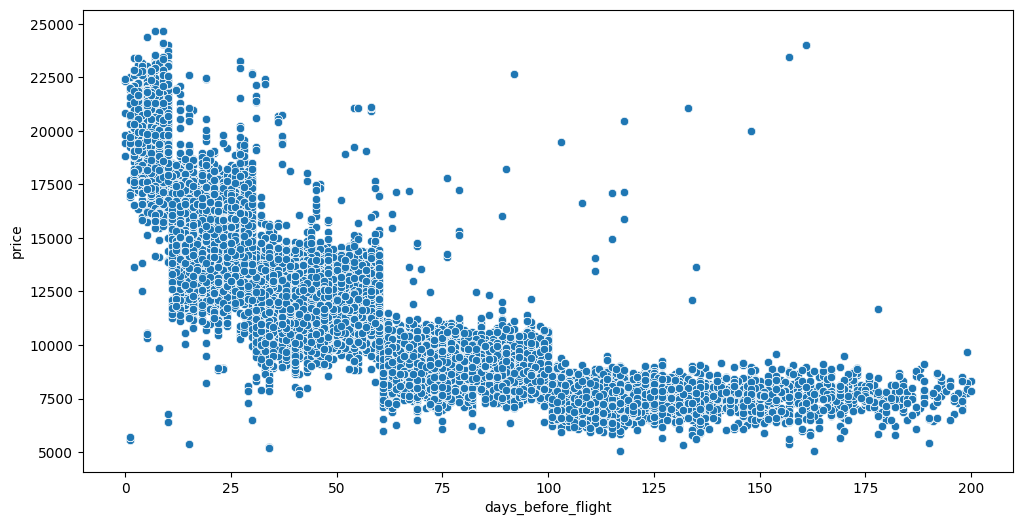

<class 'pandas.core.frame.DataFrame'>
Index: 45177 entries, 0 to 49998
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   booking_date        45177 non-null  datetime64[ns]
 1   flight_date         45177 non-null  datetime64[ns]
 2   price               45177 non-null  float64       
 3   days_before_flight  45177 non-null  int64         
 4   outlier             45177 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1)
memory usage: 1.8 MB



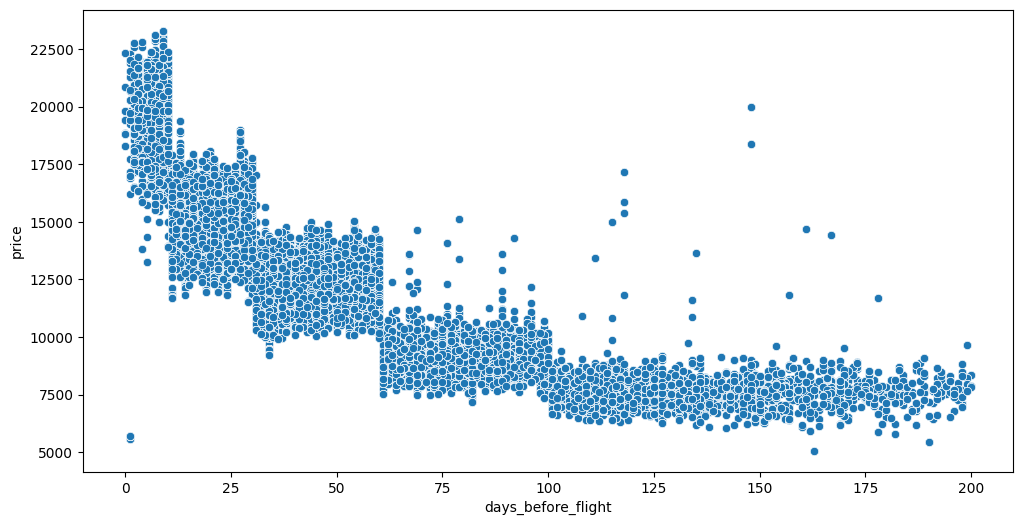

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   booking_date        50000 non-null  datetime64[ns]
 1   flight_date         50000 non-null  datetime64[ns]
 2   price               50000 non-null  float64       
 3   days_before_flight  50000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 1.5 MB


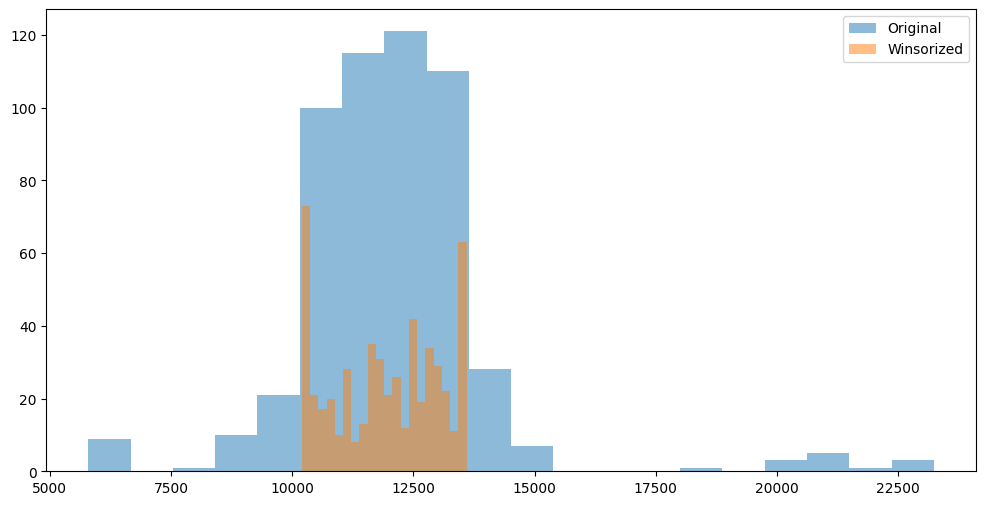

In [ ]:

# Trimming / Removing

df_clean_outlier = df[df['outlier'] == False].copy()
df_clean_outlier.head()
fig,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='days_before_flight', y='price',data=df_clean_outlier,ax=ax)
plt.show()
df_clean_outlier.info()

print()
# Winsorization / Clipping / Capping

df_clean_outlier = df.copy()
# df_clean_outlier.info()
df_clean_outlier.drop(columns=['outlier'],inplace=True)

lower_percentile = 0.10
upper_percentile = 0.90

for days_before_flight in df_clean_outlier['days_before_flight'].unique():
  mask = df_clean_outlier['days_before_flight'] == days_before_flight

  lower = df_clean_outlier[mask]['price'].quantile(lower_percentile)
  upper = df_clean_outlier[mask]['price'].quantile(upper_percentile)

  df_clean_outlier.loc[mask,'price'] = df_clean_outlier[mask]['price'].clip(lower,upper)

fig,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='days_before_flight', y='price',data=df_clean_outlier,ax=ax)
plt.show()
df_clean_outlier.info()

plt.figure(figsize=(12,6))
days_before_flight = 50
before = df[df['days_before_flight'] == days_before_flight]
after = df_clean_outlier[df_clean_outlier['days_before_flight'] == days_before_flight]

plt.hist(before['price'],bins=20,alpha=0.5,label='Original')
plt.hist(after['price'],bins=20,alpha=0.5,label='Winsorized')
plt.legend()
plt.show()



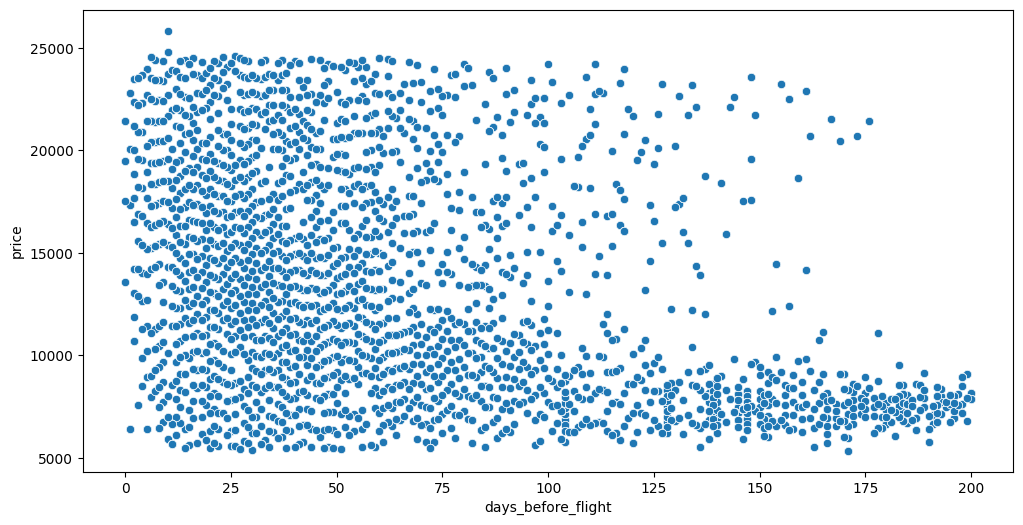

In [5]:
# equal-width binning

df_clean_outlier = df.copy()

for days_before_flight in df_clean_outlier['days_before_flight'].unique():
# for days_before_flight in df_clean_outlier['days_before_flight'].unique()[0:1]:
  mask = df_clean_outlier['days_before_flight'] == days_before_flight
  data = df_clean_outlier[mask]['price'].copy()

  # custom binning
  # num_bins = 5

  #Sturges' Rule:
  num_bins = int(np.ceil(1+np.log2(len(data))))

  #Freedman-Diaconis Rule:
  q75,q25 = np.percentile(data,[75,25])
  iqr = q75-q25
  bin_width = 2*iqr*(len(data) ** (-1/3))
  num_bins = int(np.ceil((data.max() - data.min())/bin_width))

  #Rice Rule:
  num_bins = int(np.ceil(2*len(data)**(-1/3)))

  #Square root choice:
  num_bins = int(np.sqrt(len(data)))

  binned_data = pd.cut(df_clean_outlier[mask]['price'],bins=num_bins)
  # print(binned_data)
  bin_edges = pd.cut(df_clean_outlier[mask]['price'],bins=num_bins,retbins=True)[1]
  # print(bin_edges)
  binned_midpoints = pd.cut(df_clean_outlier[mask]['price'],bins=num_bins,labels=False)
  # print(binned_midpoints)
  midpoints = (bin_edges[:-1] + bin_edges[1:])/2
  # print(midpoints)
  data_binned = midpoints[binned_midpoints]

  # display(df_clean_outlier.loc[mask]['price'])
  df_clean_outlier.loc[mask,'price'] = data_binned
  # display(df_clean_outlier.loc[mask]['price'])

fig,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='days_before_flight',y='price',data=df_clean_outlier,ax=ax)
plt.show()


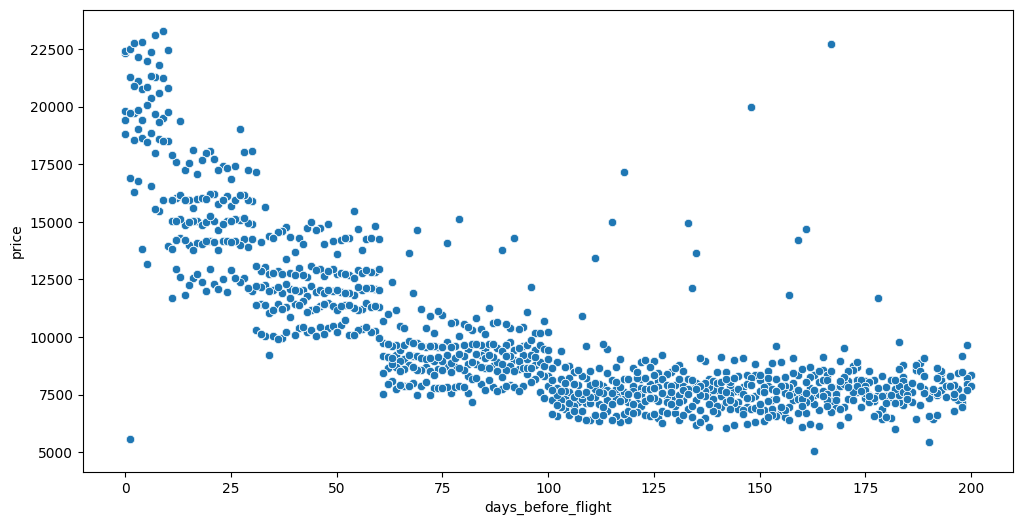

In [18]:
# equal-freq binning

df_clean_outlier = df.copy()

for days_before_flight in df_clean_outlier['days_before_flight'].unique():
# for days_before_flight in df_clean_outlier['days_before_flight'].unique()[1:2]:
  mask = df_clean_outlier['days_before_flight'] == days_before_flight
  data = df_clean_outlier[mask]['price'].copy()

  # custom binning
  num_bins = 5

  #Sturges' Rule:
  # num_bins = int(np.ceil(1+np.log2(len(data))))

  #Freedman-Diaconis Rule:
  # q75,q25 = np.percentile(data,[75,25])
  # iqr = q75-q25
  # bin_width = 2*iqr*(len(data) ** (-1/3))
  # num_bins = int(np.ceil((data.max() - data.min())/bin_width))

  #Rice Rule:
  # num_bins = int(np.ceil(2*len(data)**(-1/3)))

  #Square root choice:
  # num_bins = int(np.sqrt(len(data)))

  binned_labels = pd.qcut(data, q=num_bins, labels=False,duplicates='drop')
  # print(binned_labels)
  bin_medians = [data[(binned_labels == i)].median() for i in range(num_bins)]
  # print(bin_medians)
  data_binned = pd.Series([bin_medians[i] for i in binned_labels])
  data_binned.index = binned_labels.index

  # display(df_clean_outlier.loc[mask]['price'])
  df_clean_outlier.loc[mask,'price'] = data_binned
  # display(df_clean_outlier.loc[mask]['price'])

fig,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='days_before_flight',y='price',data=df_clean_outlier,ax=ax)
plt.show()


In [15]:
data.sort_values()

,price
21407,6092.955187
21346,6092.955187
21306,6092.955187
21379,6092.955187
2,6800.089944
32,6892.964384
38,6892.964384
40,6892.964384
4102,7123.280497
4113,7123.280497
